In [ ]:
import tensorflow as tf


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.998):
      print("\n Accuracy at 99.8%, hence cancelling the training!")
      self.model.stop_training=True


In [ ]:
callbacks = myCallback()


#Importing the Dataset

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Checking the shapes of the imported arrays

In [ ]:

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


#Plotting an image example

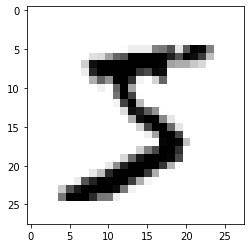

In [ ]:


from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(X_train[0], cmap='binary')
plt.show()

#Displaying the Label

In [ ]:
y_train[0]

5

#One Hot Encoding



One-hot is a group of bits among which the legal combinations of values are only those with a single high bit and all the others low.

Every label will be converted to a list with 10 elements & the element at the index corresponding class will be set to 1 and the rest will be set to 0


#Encoding labels

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


#Displaying the Encoded Labels

In [ ]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#Preprocessing

In [ ]:
import numpy as np


X_train_reshaped = np.reshape(X_train, (60000, 784))
X_test_reshaped = np.reshape(X_test, (10000, 784))

#Displaying Pixel Values

In [ ]:
print(set(X_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


#Data Normalization

Since the pixel values are large we will be normalizing to improve the computational speed


In [ ]:
X_mean = np.mean(X_train_reshaped)
X_std = np.std(X_train_reshaped)
epsilon = 1e-10 #adding a value to avoid destabilization 
X_train_normalized = ((X_train_reshaped - X_mean)/(X_std + epsilon))
X_test_normalized = ((X_test_reshaped - X_mean)/(X_std + epsilon))

We can see in the bottom line of code that the pixel values have been reduced.
Hence we have normalized!

In [ ]:
print(set(X_train_normalized[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

#Creating a Machine Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
model = Sequential([
                    tf.keras.layers.Dense(512, activation='relu', input_shape=(784, )),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dense(10, activation='softmax')
])


#Compiling the Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

The below line of code displays the architecture of the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 485,386
Trainable params: 485,386
Non-trainable params: 0
_________________________________________________________________


#Training the Model

In [ ]:
model.fit(X_train_normalized, y_train_encoded, epochs = 60, callbacks=[callbacks])

Epoch 1/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0172 - accuracy: 0.9974
Epoch 2/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0122 - accuracy: 0.9978
Epoch 3/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0185 - accuracy: 0.9972
Epoch 4/60
1872/1875 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9981
 Accuracy at 99.8%, hence cancelling the training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0097 - accuracy: 0.9981


#Evaluating the Model

In [ ]:
#loss, accuracy = model.evaluate(X_test, y_test_encoded)
#print('Test set accuracy(%): ', accuracy*100)
#print('Test set loss(%): ', loss*100)

#Predictions on Test Set

In [ ]:
preds = model.predict(X_test_normalized)

#Plotting the Figures

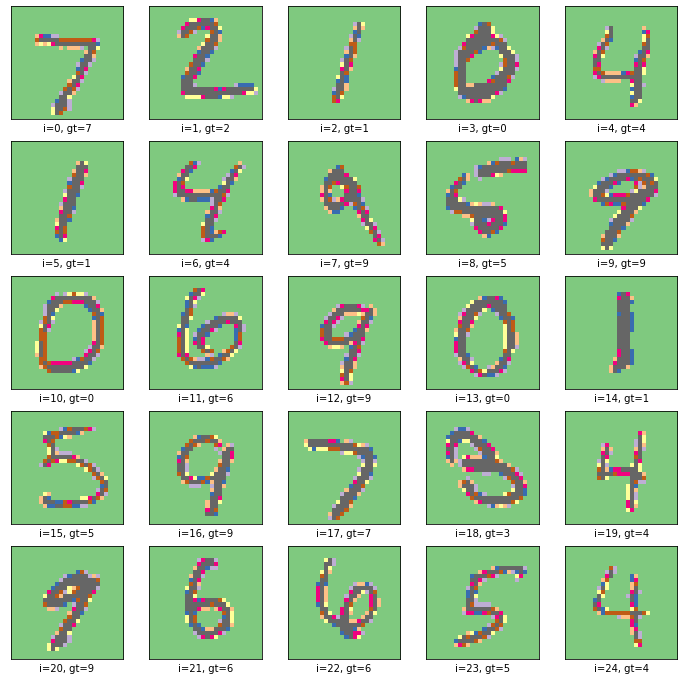

In [ ]:
plt.figure(figsize=(12,12))
start_index = 0

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_index+i])

  gt = y_test[start_index+i] #gt = ground truth

  if pred != gt:
    col = 'r' 



  plt.xlabel('i={}, gt={}'.format(start_index+i, pred, gt))

  plt.imshow(X_test[start_index+i], cmap='Accent')

plt.show()

